In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 9s 1us/step


In [3]:
print('number of training data: ', len(x_train))
print('number of test data: ', len(x_test))

number of training data:  60000
number of test data:  10000


In [4]:
print('shape of training data: ', x_train.shape)
print('shape of test data: ', x_test.shape)
print('shape of data: ', x_train[0].shape)

shape of training data:  (60000, 28, 28)
shape of test data:  (10000, 28, 28)
shape of data:  (28, 28)


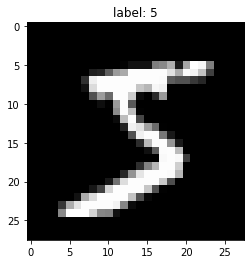

In [5]:
image = x_train[0]
label = y_train[0]

plt.imshow(image, cmap='gray')
plt.title('label: %s' % label)
plt.show()

In [6]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [7]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
x_train_4d = x_train.reshape(-1, 28, 28, 1)
x_test_4d = x_test.reshape(-1, 28, 28, 1)
print('shape of x_train_4d: ', x_train_4d.shape)
print('shape of x_test_4d: ', x_test_4d.shape)

shape of x_train_4d:  (60000, 28, 28, 1)
shape of x_test_4d:  (10000, 28, 28, 1)


In [10]:
cnn_model.fit(x_train_4d, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 41s 21ms/step - loss: 0.2399 - accuracy: 0.9432
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0670 - accuracy: 0.9794
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0513 - accuracy: 0.9842
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0461 - accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0385 - accuracy: 0.9884


In [11]:
cnn_model.evaluate(x_test_4d, y_test, verbose=1)

313/313 [==============================] - 3s 10ms/step - loss: 0.0450 - accuracy: 0.9867


[0.044998250901699066, 0.9866999983787537]

In [12]:
eval_data = x_test[500]
eval_data_label = y_test[500]
cnn_model(eval_data.reshape(-1, 28, 28, 1))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[9.2117726e-14, 8.1979410e-09, 2.8640269e-08, 1.0000000e+00,
        1.6206978e-11, 2.7830922e-09, 1.2428408e-11, 4.6945473e-08,
        5.0550040e-11, 3.0225298e-08]], dtype=float32)>

In [13]:
print(eval_data_label)

3
